<a href="https://colab.research.google.com/github/waltermayor/DigitalImageProcessing_colab/blob/master/cafe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

# importar librerias necesarias 

import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

path='/content/drive/My Drive/colab/images/'
os.chdir(path)
!pwd

# graficar imagenes estaticas en el notebook
%matplotlib inline  

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/colab/images


In [0]:
def display4(a, b,c,d,title1 = "Original", title2 = "Edited", title3 = "Edited", title4 = "Edited"):
    plt.figure(figsize=(12,4))
    plt.subplot(141), plt.imshow(a,cmap='gray'), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(142), plt.imshow(b,cmap='gray'), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.subplot(143), plt.imshow(c), plt.title(title3)
    plt.xticks([]), plt.yticks([])
    plt.subplot(144), plt.imshow(d,cmap='gray'), plt.title(title4)
    plt.xticks([]), plt.yticks([])
    plt.show()

In [0]:
def Threshold(img,thres):
    #Cargar imagen
    rows, columns = img.shape
    img2 = np.zeros( (rows, columns), dtype = np.uint8)
     
    #intervalos
    T = thres
 
    for x in range(0,rows):
        for y in range(0,columns):
            r = img[x][y]
            if T<=r:
                img2[x][y] = 255
            else:
                img2[x][y] = 0
    return img2
  
def negative(img):
    #Cargar imagen
    rows, columns = img.shape
    img2 = np.zeros((rows, columns), dtype = np.uint8)
    for x in range(rows):
        for y in range(columns):
            img2[x, y] = (256-1)-img[x,y]
    return img2
  
def fraccionamiento(img,minr=10,maxr=60):
    #Cargar imagen
    rows, columns = img.shape
    img2 = np.zeros( (rows, columns), dtype = np.uint8)
     
    #intervalos
    a = minr
    b = maxr
 
    for x in range(0,rows):
        for y in range(0,columns):
            r = img[x][y]
            if a <=r and r<=b:
                img2[x][y] = 255
            else:
                img2[x][y] = img[x][y]
    
    return img2

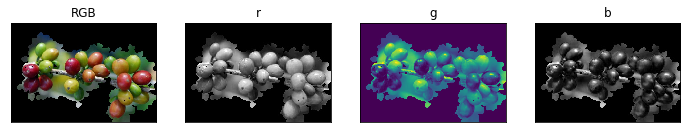

In [60]:
img_BGR=cv2.imread('cafe2.jpg',cv2.IMREAD_COLOR)
img_RGB=cv2.cvtColor(img_BGR,cv2.COLOR_BGR2RGB)
r,g,b = cv2.split(img_RGB)

display4(img_RGB,r,g,b,"RGB","r","g","b")

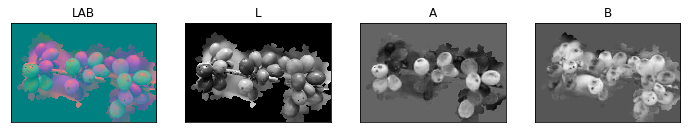

In [42]:
img_LAB=cv2.cvtColor(img_BGR, cv2.COLOR_BGR2LAB);
L,A,B = cv2.split(img_LAB)
display4(img_LAB,L,A,B,"LAB","L","A","B")

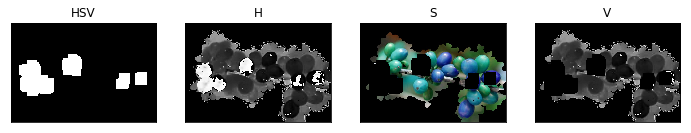

In [107]:
img_HSV=cv2.cvtColor(img_BGR, cv2.COLOR_BGR2HSV);
H,S,V = cv2.split(img_HSV)
H2= np.array(255*(H/255)**2.2,dtype='uint8')
#kernel = np.ones((5,5), np.uint8)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
#kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
#kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
H2=Threshold(H2,100)
H2=erosion = cv2.erode(H2,kernel,iterations = 2)
M_R = cv2.dilate(H2, kernel, iterations=9)
H2=negative(M_R)
new_im=cv2.bitwise_and(img_BGR,img_BGR,mask=H2)
img_HSV=cv2.cvtColor(new_im, cv2.COLOR_BGR2HSV);
H3,S,V = cv2.split(img_HSV)
display4(M_R,H,new_im,H3,"HSV","H","S","V")




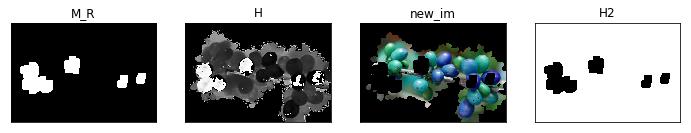

In [108]:
img_BGR=cv2.imread('cafe2.jpg',cv2.IMREAD_COLOR)
img_HSV=cv2.cvtColor(img_BGR, cv2.COLOR_BGR2HSV);
H,S,V = cv2.split(img_HSV)
H2= np.array(255*(H/255)**2.2,dtype='uint8')
#kernel = np.ones((5,5), np.uint8)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
#kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
#kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
H2=Threshold(H2,100)
H2=erosion = cv2.erode(H2,kernel,iterations = 2)
M_R = cv2.dilate(H2, kernel, iterations=6)
H2=negative(M_R)
new_im=cv2.bitwise_and(img_BGR,img_BGR,mask=H2)

display4(M_R,H,new_im,H2,"M_R","H","new_im","H2")

[[[425 313]]

 [[424 314]]

 [[421 314]]

 [[416 319]]

 [[415 319]]

 [[412 322]]

 [[411 322]]

 [[411 323]]

 [[410 324]]

 [[410 326]]

 [[409 327]]

 [[409 328]]

 [[408 329]]

 [[406 329]]

 [[405 330]]

 [[405 331]]

 [[404 332]]

 [[404 334]]

 [[402 336]]

 [[402 337]]

 [[401 338]]

 [[401 339]]

 [[400 340]]

 [[400 344]]

 [[397 347]]

 [[397 377]]

 [[398 378]]

 [[398 380]]

 [[422 380]]

 [[423 381]]

 [[423 397]]

 [[451 397]]

 [[452 396]]

 [[453 396]]

 [[454 395]]

 [[455 395]]

 [[456 394]]

 [[457 394]]

 [[458 393]]

 [[459 393]]

 [[459 392]]

 [[462 389]]

 [[463 389]]

 [[464 388]]

 [[464 387]]

 [[469 382]]

 [[469 381]]

 [[470 380]]

 [[470 379]]

 [[472 377]]

 [[472 375]]

 [[473 374]]

 [[473 365]]

 [[474 364]]

 [[474 334]]

 [[472 332]]

 [[472 331]]

 [[470 331]]

 [[469 330]]

 [[467 330]]

 [[466 329]]

 [[464 329]]

 [[463 328]]

 [[463 327]]

 [[460 324]]

 [[459 324]]

 [[456 321]]

 [[455 321]]

 [[454 320]]

 [[454 319]]

 [[453 318]]

 [[453

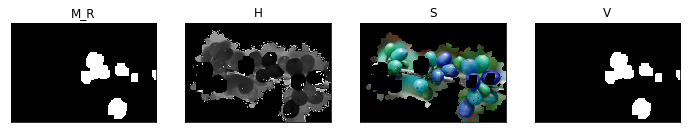

In [111]:

img_HSV=cv2.cvtColor(new_im, cv2.COLOR_BGR2HSV);
H_3,S,V = cv2.split(img_HSV)
H3=fraccionamiento(H_3,0,1)
H3= Threshold(H3,20)
H3=negative(H3)
H3=erosion = cv2.erode(H3,kernel,iterations = 3)
M_Y = cv2.dilate(H3, kernel, iterations=6)

_, contours, _= cv2.findContours(image = M_Y, mode = cv2.RETR_EXTERNAL, method = cv2.CHAIN_APPROX_SIMPLE)
M_YC=cv2.drawContours(image = new_im, contours = contours[0], contourIdx = -1, color = (255, 0, 0), thickness = -1)

#areas=[]

for idx,c in enumerate(contours):
    area=cv2.contourArea(c)
    #areas.append(cv2.contourArea(c))
    print(c)
    
    if area <= 1000:
      print(area)
      M_YC=cv2.drawContours(image = new_im, contours = c, contourIdx = -1, color = (255, 0, 0), thickness = -1)
      

#print(areas)    
display4(M_Y,H_3,M_YC,M_Y,"M_R","H","S","V")